In [2]:
import numpy
import matplotlib.pyplot as plt
import math
import pandas as pd
plt.rcParams.update({'font.size': 18})

In [3]:
conv = 6.2112 #pix/ 1 um

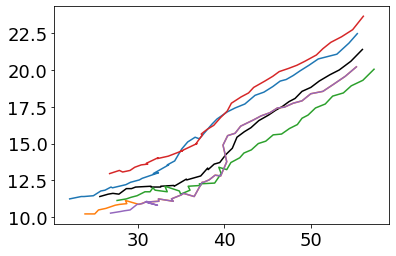

In [4]:
beads_filename = '/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200120_olympus_single_cell_beads/20200123_bw25113_unwashed_1um_delt2min_delz1um_18h-21h/tracks2/beads/02.csv'
df_beads = pd.read_csv(beads_filename, index_col = 0)
df_beads.reset_index(inplace = True, drop = True)
plt.plot(df_beads['X']/conv, df_beads['Y']/conv, 'k')
d_all = numpy.empty((len(df_beads), 5))
for i in range(1,6):
    if i<10:
        cells_filename = '/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200120_olympus_single_cell_beads/20200123_bw25113_unwashed_1um_delt2min_delz1um_18h-21h/tracks2/cells/0'+str(i)+'.csv'
    else:
        cells_filename = '/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200120_olympus_single_cell_beads/20200123_bw25113_unwashed_1um_delt2min_delz1um_18h-21h/tracks2/cells/'+str(i)+'.csv'
    df_cells = pd.read_csv(cells_filename, index_col = 0)
    df_cells = df_cells.iloc[::-1]
    df_cells.reset_index(drop = True, inplace = True)
    plt.plot(df_cells['X']/conv, df_cells['Y']/conv)
    # Need to invert the df_cells (since it goes backwards)
    d = (1/conv)*numpy.sqrt((df_beads['X']-df_cells['X'])**2 + (df_beads['Y']-df_cells['Y'])**2)
    d_all[:,i-1] = d
    
d_all = d_all[:31, :]

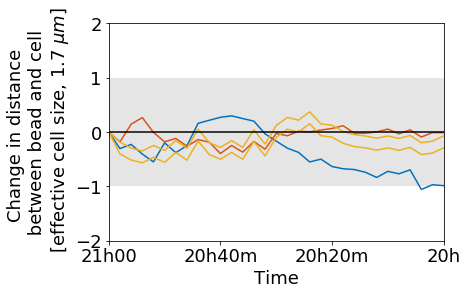

In [5]:
colors = numpy.array([[0, 0.4470, 0.7410], 
                      [0.8500, 0.3250, 0.0980],
                      [0.9290, 0.6940, 0.1250],
                      [0.4940, 0.1840, 0.5560],
                      [0.4660, 0.6740, 0.1880],
                      [0.3010, 0.7450, 0.9330],
                      [0.6350, 0.0780, 0.1840]])
colors_index = 0
for i in [0, 2, 1, 4]:#range(d_all.shape[1]):
    plt.plot((d_all[:,i]-d_all[-1,i])/1.7, color = colors[colors_index,:])
    #if i<d_all.shape[1]-1 and d_all[0,i+1]!=d_all[0,i]:
    if i != 1:
        colors_index += 1
# plt.plot([0, d_all.shape[0]], [0, 0], color = 'k')
plt.fill_between([0, 40], -1, 1, facecolor='gray', alpha = 0.2)
plt.plot([0,40], [0, 0], 'k')
# plt.xticks(ticks = numpy.array([0,10,20,30,40]), labels = numpy.array(['1', '0.67', '0.33', '0']))
plt.xticks(ticks = numpy.array([0,10,20,30,40]), labels = numpy.array(['20h', '20h20m', '20h40m', '21h00']))
plt.xlabel('Time')
plt.ylabel('Change in distance \n between bead and cell \n [effective cell size, 1.7 $\mu m$]')

plt.xlim([0, d_all.shape[0]-1])
plt.ylim([-2,2])

plt.gca().invert_xaxis()

plt.savefig('/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200228_spatial_genetic_drift_summary/figures/bead_cell_deviation1_backwards_neighbors_cell_size_second_fov.pdf')
# plt.tight_layout()
plt.savefig('/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200228_spatial_genetic_drift_summary/figures/bead_cell_deviation1_backwards_neighbors_cell_size_second_fov.png')

plt.show()

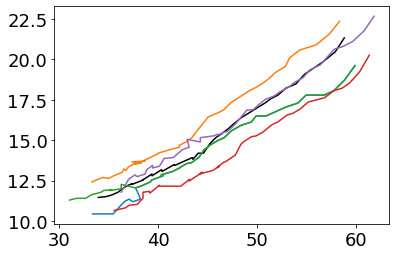

In [6]:
beads_filename = '/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200120_olympus_single_cell_beads/20200123_bw25113_unwashed_1um_delt2min_delz1um_18h-21h/tracks2/beads/03.csv'
df_beads = pd.read_csv(beads_filename, index_col = 0)
df_beads.reset_index(inplace = True, drop = True)
plt.plot(df_beads['X']/conv, df_beads['Y']/conv, 'k')
d_all = numpy.empty((len(df_beads), 5))
for i in range(6,11):
    if i<10:
        cells_filename = '/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200120_olympus_single_cell_beads/20200123_bw25113_unwashed_1um_delt2min_delz1um_18h-21h/tracks2/cells/0'+str(i)+'.csv'
    else:
        cells_filename = '/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200120_olympus_single_cell_beads/20200123_bw25113_unwashed_1um_delt2min_delz1um_18h-21h/tracks2/cells/'+str(i)+'.csv'
    df_cells = pd.read_csv(cells_filename, index_col = 0)
    df_cells = df_cells.iloc[::-1]
    df_cells.reset_index(drop = True, inplace = True)
    plt.plot(df_cells['X']/conv, df_cells['Y']/conv)
    # Need to invert the df_cells (since it goes backwards)
    d = (1/conv)*numpy.sqrt((df_beads['X']-df_cells['X'])**2 + (df_beads['Y']-df_cells['Y'])**2)
    d_all[:,i-6] = d
    
d_all = d_all[:31, :]

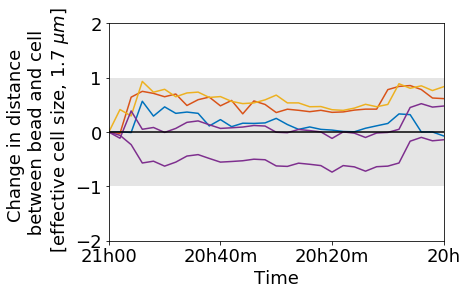

In [7]:
colors = numpy.array([[0, 0.4470, 0.7410], 
                      [0.8500, 0.3250, 0.0980],
                      [0.9290, 0.6940, 0.1250],
                      [0.4940, 0.1840, 0.5560],
                      [0.4660, 0.6740, 0.1880],
                      [0.3010, 0.7450, 0.9330],
                      [0.6350, 0.0780, 0.1840]])
colors_index = 0
for i in [1, 3, 4, 0, 2]:#range(d_all.shape[1]):
    plt.plot((d_all[:,i]-d_all[-1,i])/1.7, color = colors[colors_index,:])
    #if i<d_all.shape[1]-1 and d_all[0,i+1]!=d_all[0,i]:
    if i != 0:
        colors_index += 1
# plt.plot([0, d_all.shape[0]], [0, 0], color = 'k')
plt.fill_between([0, 40], -1, 1, facecolor='gray', alpha = 0.2)
plt.plot([0,40], [0, 0], 'k')
# plt.xticks(ticks = numpy.array([0,10,20,30,40]), labels = numpy.array(['1', '0.67', '0.33', '0']))
plt.xticks(ticks = numpy.array([0,10,20,30,40]), labels = numpy.array(['20h', '20h20m', '20h40m', '21h00']))
plt.xlabel('Time')
plt.ylabel('Change in distance \n between bead and cell \n [effective cell size, 1.7 $\mu m$]')

plt.xlim([0, d_all.shape[0]-1])
plt.ylim([-2,2])

plt.gca().invert_xaxis()

plt.savefig('/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200228_spatial_genetic_drift_summary/figures/bead_cell_deviation2_backwards_neighbors_cell_size_second_fov.pdf')
# plt.tight_layout()
plt.savefig('/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200228_spatial_genetic_drift_summary/figures/bead_cell_deviation2_backwards_neighbors_cell_size_second_fov.png')

plt.show()

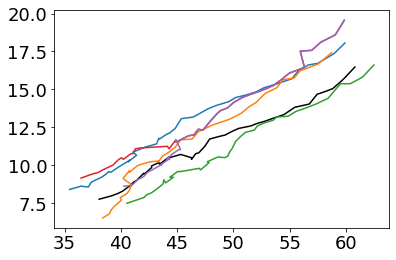

In [8]:
beads_filename = '/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200120_olympus_single_cell_beads/20200123_bw25113_unwashed_1um_delt2min_delz1um_18h-21h/tracks2/beads/01.csv'
df_beads = pd.read_csv(beads_filename, index_col = 0)
df_beads.reset_index(inplace = True, drop = True)
plt.plot(df_beads['X']/conv, df_beads['Y']/conv, 'k')
d_all = numpy.empty((len(df_beads), 5))
for i in range(11,16):
    if i<10:
        cells_filename = '/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200120_olympus_single_cell_beads/20200123_bw25113_unwashed_1um_delt2min_delz1um_18h-21h/tracks2/cells/0'+str(i)+'.csv'
    else:
        cells_filename = '/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200120_olympus_single_cell_beads/20200123_bw25113_unwashed_1um_delt2min_delz1um_18h-21h/tracks2/cells/'+str(i)+'.csv'
    df_cells = pd.read_csv(cells_filename, index_col = 0)
    df_cells = df_cells.iloc[::-1]
    df_cells.reset_index(drop = True, inplace = True)
    plt.plot(df_cells['X']/conv, df_cells['Y']/conv)
    # Need to invert the df_cells (since it goes backwards)
    d = (1/conv)*numpy.sqrt((df_beads['X']-df_cells['X'])**2 + (df_beads['Y']-df_cells['Y'])**2)
    d_all[:,i-11] = d
    
d_all = d_all[:31, :]

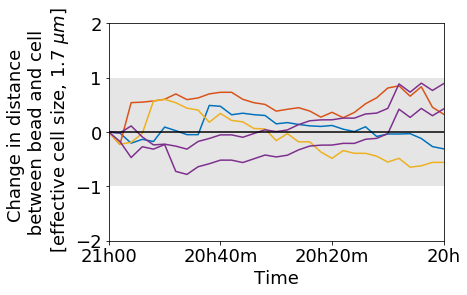

In [9]:
colors = numpy.array([[0, 0.4470, 0.7410], 
                      [0.8500, 0.3250, 0.0980],
                      [0.9290, 0.6940, 0.1250],
                      [0.4940, 0.1840, 0.5560],
                      [0.4660, 0.6740, 0.1880],
                      [0.3010, 0.7450, 0.9330],
                      [0.6350, 0.0780, 0.1840]])
colors_index = 0
for i in range(5):#[1, 3, 4, 0, 2]:#range(d_all.shape[1]):
    plt.plot((d_all[:,i]-d_all[-1,i])/1.7, color = colors[colors_index,:])
    #if i<d_all.shape[1]-1 and d_all[0,i+1]!=d_all[0,i]:
    if i != 3:
        colors_index += 1
# plt.plot([0, d_all.shape[0]], [0, 0], color = 'k')
plt.fill_between([0, 40], -1, 1, facecolor='gray', alpha = 0.2)
plt.plot([0,40], [0, 0], 'k')
# plt.xticks(ticks = numpy.array([0,10,20,30,40]), labels = numpy.array(['1', '0.67', '0.33', '0']))
plt.xticks(ticks = numpy.array([0,10,20,30,40]), labels = numpy.array(['20h', '20h20m', '20h40m', '21h00']))
plt.xlabel('Time')
plt.ylabel('Change in distance \n between bead and cell \n [effective cell size, 1.7 $\mu m$]')

plt.xlim([0, d_all.shape[0]-1])
plt.ylim([-2,2])

plt.gca().invert_xaxis()

plt.savefig('/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200228_spatial_genetic_drift_summary/figures/bead_cell_deviation3_backwards_neighbors_cell_size_second_fov.pdf')
# plt.tight_layout()
plt.savefig('/Users/qinqinyu/Documents/hallatschek_lab/data_changed/20200228_spatial_genetic_drift_summary/figures/bead_cell_deviation3_backwards_neighbors_cell_size_second_fov.png')

plt.show()